# Merge, join, and concatenate

In [2]:
import pandas as pd
import numpy as np

pandas使用pd.concat函数进行连接DataFrame的操作

In [3]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']},
                   index=[0, 1, 2, 3])

In [4]:
df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                    'B': ['B4', 'B5', 'B6', 'B7'],
                    'C': ['C4', 'C5', 'C6', 'C7'],
                    'D': ['D4', 'D5', 'D6', 'D7']},
                   index=[4, 5, 6, 7])

In [5]:
df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                    'B': ['B8', 'B9', 'B10', 'B11'],
                    'C': ['C8', 'C9', 'C10', 'C11'],
                    'D': ['D8', 'D9', 'D10', 'D11']},
                   index=[8, 9, 10, 11])

In [6]:
frames = [df1, df2, df3]
frames

[    A   B   C   D
 0  A0  B0  C0  D0
 1  A1  B1  C1  D1
 2  A2  B2  C2  D2
 3  A3  B3  C3  D3,     A   B   C   D
 4  A4  B4  C4  D4
 5  A5  B5  C5  D5
 6  A6  B6  C6  D6
 7  A7  B7  C7  D7,       A    B    C    D
 8    A8   B8   C8   D8
 9    A9   B9   C9   D9
 10  A10  B10  C10  D10
 11  A11  B11  C11  D11]

In [7]:
result = pd.concat(frames)
result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


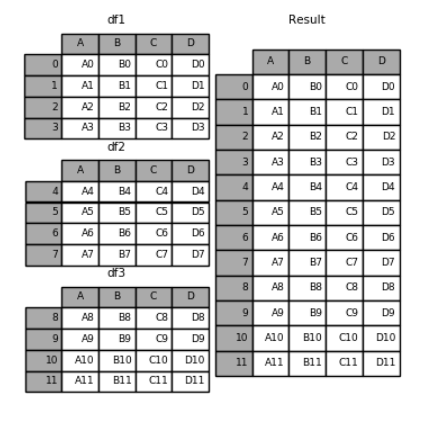

如果指定keys参数，那么就会生成带有MultiIndex的DataFrame

In [8]:
result = pd.concat(frames, keys=['x', 'y', 'z'])

In [9]:
result 

A    B    C    D
x 0    A0   B0   C0   D0
  1    A1   B1   C1   D1
  2    A2   B2   C2   D2
  3    A3   B3   C3   D3
y 4    A4   B4   C4   D4
  5    A5   B5   C5   D5
  6    A6   B6   C6   D6
  7    A7   B7   C7   D7
z 8    A8   B8   C8   D8
  9    A9   B9   C9   D9
  10  A10  B10  C10  D10
  11  A11  B11  C11  D11

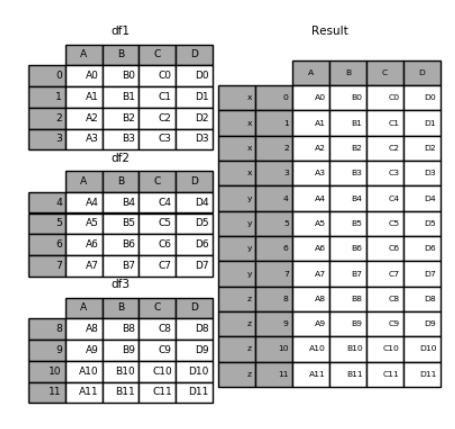